# Predicton of survival of a titanic dataset , Analysis and Machiene learning models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset

In [3]:
dataset = sns.load_dataset('titanic')

In [4]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df = dataset.copy()

In [6]:
df.shape

(891, 15)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

## Analysis 

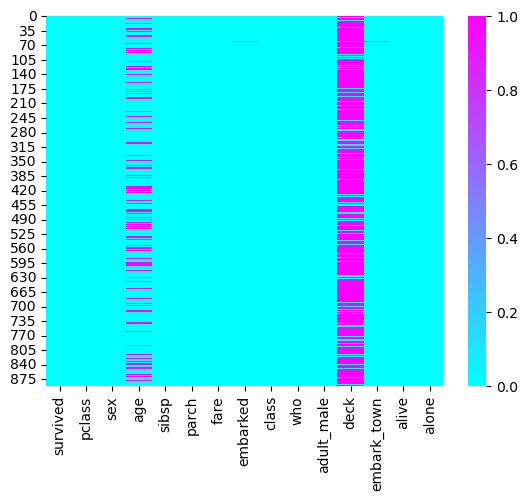

In [11]:
sns.heatmap(df.isnull(),cmap = 'cool')
plt.show()
#clealry there are somme null values in age embarked and deck columns 

In [12]:
df['age'] = df.groupby('pclass')['age'].transform(lambda x  : x.fillna(x.median()))

In [13]:
df['age'].isnull().mean()
#clearly age column null valuse are filled with median of age as per the pclass 

np.float64(0.0)

In [14]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [15]:
df['embarked'].isnull().mean()
#clearly there are no more null values in embark column and done through the mode of it  

np.float64(0.0)

In [16]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [17]:
df.shape

(891, 15)

In [18]:
df_analysis = df.copy()

In [19]:
df_analysis.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [20]:
df_analysis.drop(['who','adult_male','deck','embarked','class','alive','alone'] , axis = 1,inplace=True)

In [21]:
df_analysis.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,male,22.0,1,0,7.25,Southampton


In [22]:
df_analysis.shape

(891, 8)

In [23]:
round(df_analysis.isnull().mean()*100,3)
#embark_town has very less null values and those rowns can be directly be deleted

survived       0.000
pclass         0.000
sex            0.000
age            0.000
sibsp          0.000
parch          0.000
fare           0.000
embark_town    0.224
dtype: float64

In [24]:
df_analysis.dropna(subset=['embark_town'],inplace=True)

In [25]:
df_analysis.shape

(889, 8)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'survived'),
  Text(1.5, 0, 'pclass'),
  Text(2.5, 0, 'sex'),
  Text(3.5, 0, 'age'),
  Text(4.5, 0, 'sibsp'),
  Text(5.5, 0, 'parch'),
  Text(6.5, 0, 'fare'),
  Text(7.5, 0, 'embark_town')])

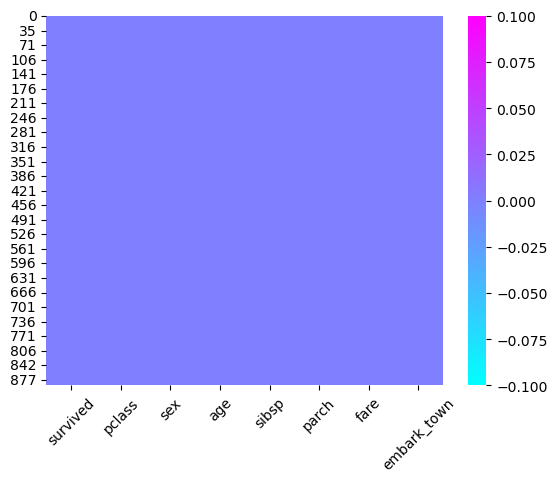

In [26]:
round(df_analysis.isnull().mean()*100,3)
sns.heatmap(df_analysis.isnull(),cmap = 'cool')
plt.xticks(rotation = 45)
#now we have the clean dataframe without any noise null values

In [27]:
df_analysis_c =df_analysis.copy() 

<Axes: xlabel='survived', ylabel='count'>

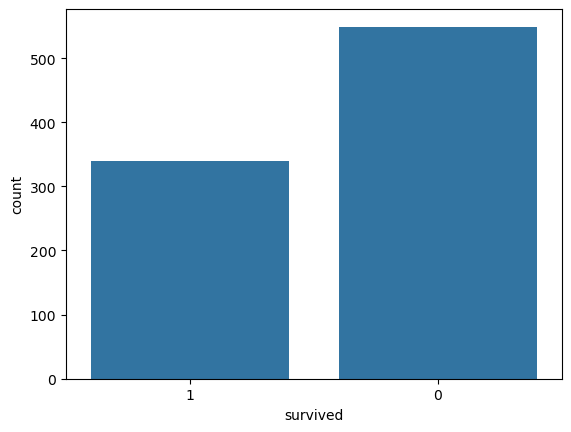

In [28]:
sns.countplot(data = df_analysis_c, x = 'survived' ,order=['1','0'])
#clearly there are less number of  surivied(1) 

Text(0.5, 1.0, 'pclass survived ')

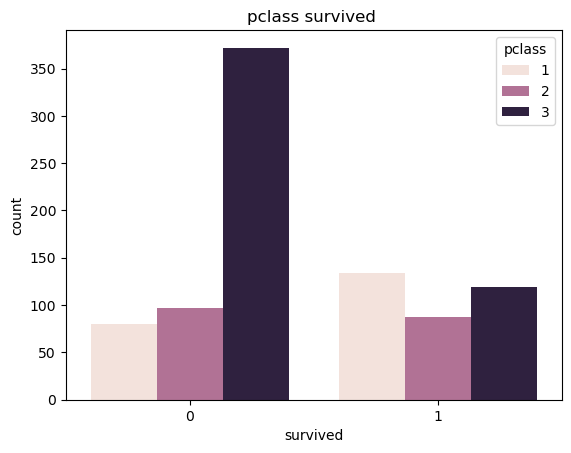

In [29]:
sns.countplot(data = df_analysis_c, x = 'survived' ,hue = 'pclass' ,palette=sns.cubehelix_palette(n_colors=3 , light=0.9 ,hue=1))
plt.title('pclass survived ')
#clearly 3rd class have the less survival rate than compared to the 1st,2nd class 

'clearly we see the 3X2 matrix such that \n        for pclass=1,3 more number of male are survived than the female\n        for all pclass there are more numbers of male are died than the female '

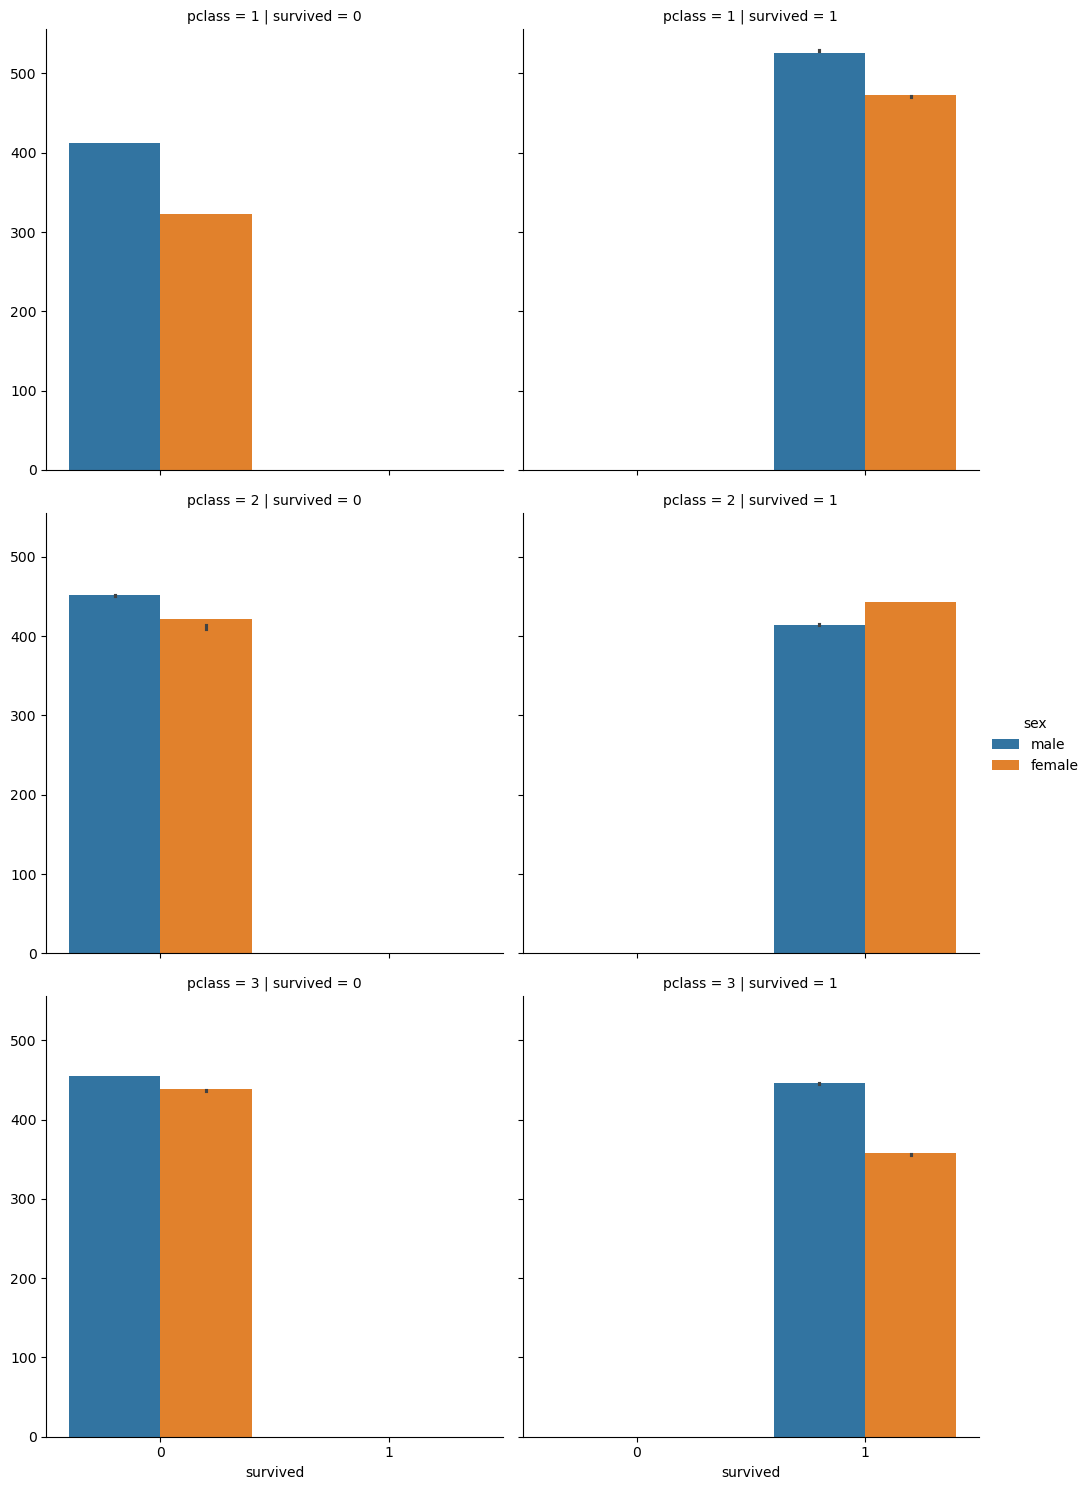

In [30]:
sns.catplot(kind = 'bar' ,data = df_analysis_c,
            x = 'survived',
            col='survived' ,row = 'pclass'
            ,y = range(889),hue = 'sex' ,errorbar = ('ci' ,True))
'''clearly we see the 3X2 matrix such that 
        for pclass=1,3 more number of male are survived than the female
        for all pclass there are more numbers of male are died than the female '''

<Axes: xlabel='age', ylabel='Count'>

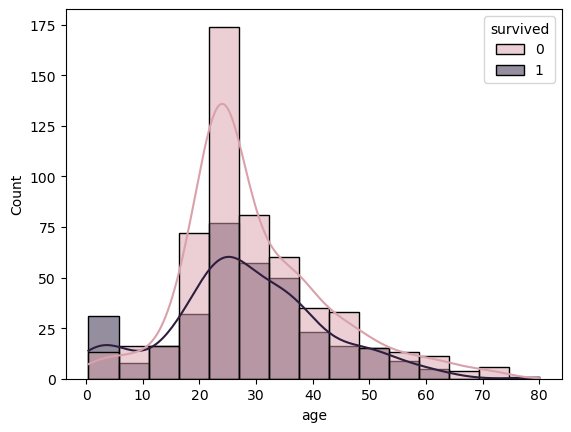

In [31]:
sns.histplot(data = df_analysis_c, x = 'age' ,hue = 'survived' ,kde=True ,bins  = 15 ,palette= sns.cubehelix_palette(light=0.7,n_colors=2))
#clearly  more number of passengers are of teeenage toage (15 - 35) and half of the percent are survived
#clearly age from 0-5 are mostly survived because of may be teenage rescue plan

<Axes: xlabel='sibsp', ylabel='Count'>

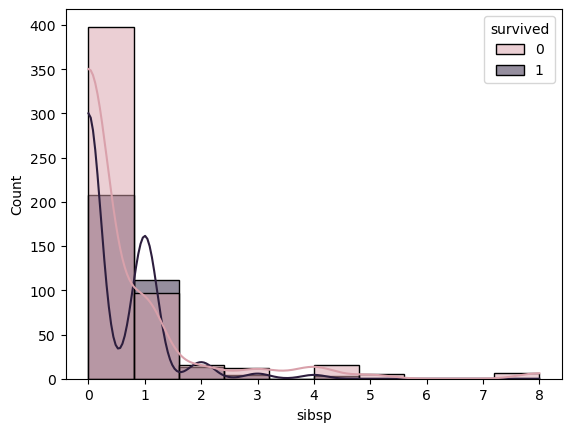

In [32]:
sns.histplot(data = df_analysis_c, x = 'sibsp' ,hue = 'survived' ,kde=True ,bins  = 10 ,palette= sns.cubehelix_palette(light=0.7,n_colors=2))
#clearly  more number of passengers are having siblinggs,spouse count  =0 i.e, single  they are half of the percent  survived
#clearly  some number of passengers of sibsp =2 are completely survived
#clearly  some number of passengers of sibsp =4 are  completely unsurvived

'clearly the most number of the passengers are boarding to the town called  southampton and then followed by cherbourg\nSouthampton    ------- 644\nCherbourg      ------- 168\nQueenstown     ------- 77\ndf_analysis_c.embark_town.value_counts() '

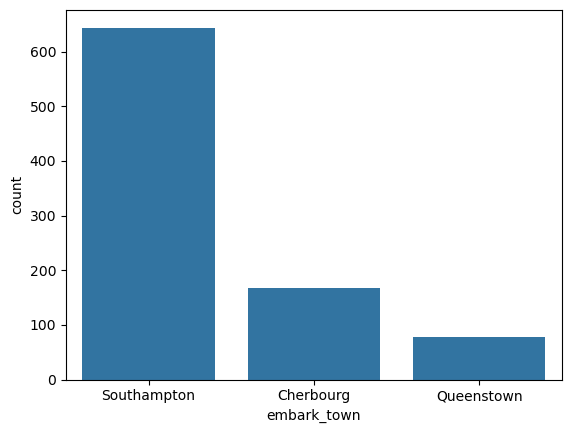

In [33]:
sns.countplot(data = df_analysis_c ,x ='embark_town' )
'''clearly the most number of the passengers are boarding to the town called  southampton and then followed by cherbourg
Southampton    ------- 644
Cherbourg      ------- 168
Queenstown     ------- 77
df_analysis_c.embark_town.value_counts() '''

In [34]:
df_embark_survived = (
    df_analysis_c
    .groupby(['embark_town', 'survived'])
    .size()
    .unstack(fill_value=0)
)
df_embark_survived

survived,0,1
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


<Axes: xlabel='embark_town', ylabel='count'>

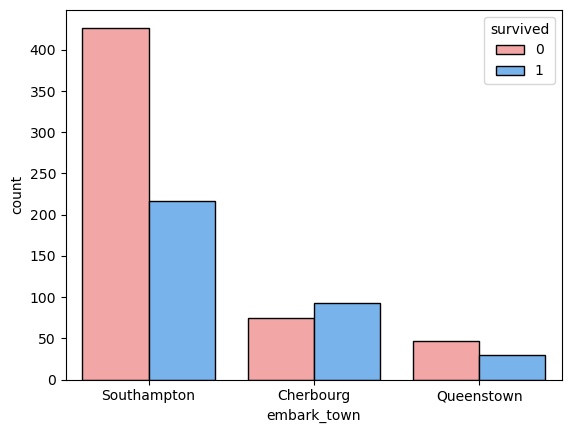

In [35]:
sns.countplot(
    data=df_analysis_c,
    x='embark_town',
    hue='survived',
    palette=['#ff9999', '#66b3ff'],
    edgecolor='black'
)
#clearly the passengers going to cherbourg are survived than unsurvived

## Now selecting the features and class

In [36]:
x = df[['pclass','sex','age','sibsp','parch','fare']]

In [37]:
x.head()

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [38]:
y = df['survived']

In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [40]:
male = pd.get_dummies(x['sex'],drop_first=True)

In [41]:
male

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [42]:
x = pd.concat([x,male],axis = 1)

In [43]:
x.drop('sex' ,axis =1,inplace=True)

In [44]:
x.male =  x.male.map({True:1 ,False:0})

In [45]:
x.head()

,pclass,age,sibsp,parch,fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


## Logistic Regression ML 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x ,y ,test_size=0.3,random_state=13)
#for training and testing dataset is spliited in  70: 30 ratio 

## logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
classifier = LogisticRegression()

In [50]:
classifier.fit(X_train ,y_train)

LogisticRegression()

In [51]:
round(classifier.score(X_train,y_train)*100,4)

80.7384

In [52]:
y_predict = classifier.predict(X_test)

In [53]:
round(classifier.score(X_test,y_test)*100,4)

79.4776

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
print(classification_report(y_predict , y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       174
           1       0.70      0.72      0.71        94

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268



In [56]:
confusion_matrix(y_predict ,y_test)

array([[145,  29],
       [ 26,  68]])

In [57]:
print(round(accuracy_score(y_predict,y_test)*100 ,4))

79.4776


In [58]:
# This logistic regression classifier model got the 79.4776 % accuracy 

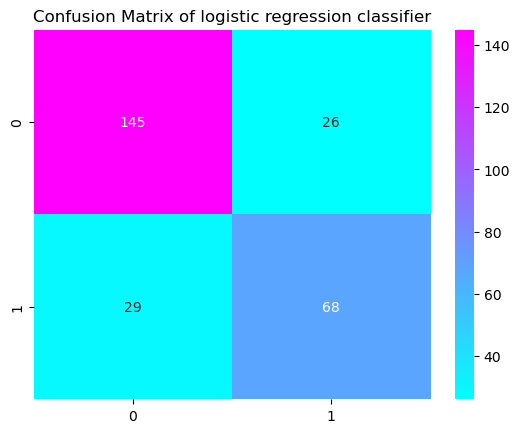

In [59]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='cool')
plt.title("Confusion Matrix of logistic regression classifier")
plt.show()

## RandomForestClassifier ML

In [60]:
from sklearn.ensemble import RandomForestClassifier 

In [61]:
RFclassifier = RandomForestClassifier(n_estimators=8)

In [76]:
RFclassifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=8)

In [77]:
from joblib import dump , load

In [85]:
dump( RFclassifier , 'RFclassifier_titanic_ml.joblib')
#here joblib helps to train the model for one time  thus no need to retrain again and its saves as file

['RFclassifier_titanic_ml.joblib']

In [98]:
round(RFclassifier.score(X_train,y_train)*100,4)
# clearly randomforest classifer has training accuracy  of 95.8266

95.8266

In [87]:
#loading the model from the joblib
RFclassifier_joblib = load('RFclassifier_titanic_ml.joblib')

In [88]:
y_predict_rf =  RFclassifier_joblib.predict(X_test)

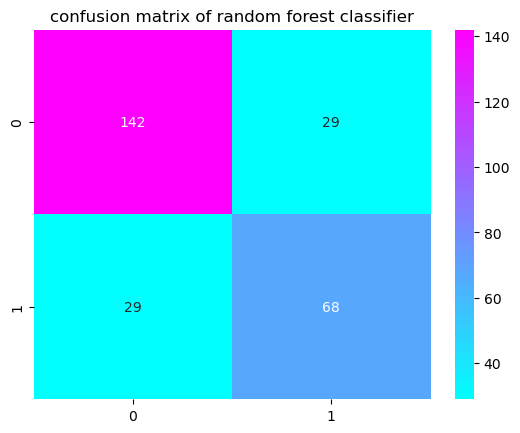

In [89]:
sns.heatmap(confusion_matrix(y_predict_rf ,y_test),cmap = 'cool',annot=True ,fmt = 'd')
plt.title('confusion matrix of random forest classifier')
plt.show()

In [90]:
round(accuracy_score(y_predict_rf ,y_test)*100,4)

78.3582

In [99]:
print(classification_report(y_predict_rf ,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       171
           1       0.70      0.70      0.70        97

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



### trail and error method for best accuracy

In [100]:
acc = []

In [101]:
for i in range(1,40):
    esti = i
    rfobj = RandomForestClassifier(n_estimators=i ,random_state=0)
    rfobj.fit(X_train,y_train)
    y_predict_rf_loop =  rfobj.predict(X_test)
    print(f'{i} :{round(accuracy_score(y_predict_rf_loop ,y_test)*100,4)}' ,end = '   ')
    acc.append(round(accuracy_score(y_predict_rf_loop ,y_test)*100,4))
    
        

1 :76.8657   2 :78.7313   3 :76.4925   4 :79.1045   5 :77.6119   6 :79.1045   7 :79.1045   8 :80.597   9 :79.4776   10 :79.1045   11 :77.9851   12 :78.7313   13 :78.3582   14 :78.7313   15 :77.6119   16 :79.8507   17 :79.4776   18 :79.8507   19 :78.7313   20 :79.8507   21 :79.4776   22 :79.8507   23 :79.4776   24 :80.2239   25 :80.597   26 :80.2239   27 :80.2239   28 :79.4776   29 :80.2239   30 :80.597   31 :79.8507   32 :80.597   33 :80.2239   34 :79.8507   35 :80.2239   36 :79.8507   37 :80.2239   38 :79.8507   39 :80.2239   

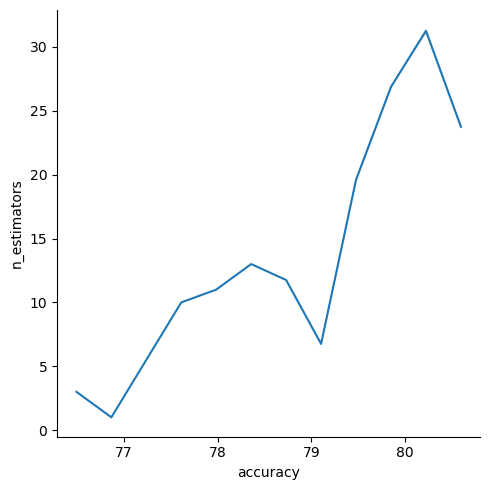

In [106]:
sns.relplot( kind = 'line' ,x = acc ,y = range(1,40)  ,errorbar = ('ci' ,False))
plt.xlabel('accuracy')
plt.ylabel('n_estimators')
plt.show()

In [104]:
max(acc)

80.597

In [105]:
acc.index(80.597)

7

In [74]:
#from this clearly the best accuracy wiil be at n_estimators = 8,

In [75]:
#randomforestmodel  is better than the logistic regression model 